<a href="https://colab.research.google.com/github/DiCorzo/33-js-conceptos/blob/master/Copia_de_Untitled10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

print("Librerías importadas correctamente.")


Librerías importadas correctamente.


In [ ]:
# --- 1. Datos de Clientes ---
num_clientes = 1000
clientes = {
    'cliente_id': range(1, num_clientes + 1),
    'edad': np.random.randint(15, 60, num_clientes),
    'region': np.random.choice(['Norte', 'Sur', 'Este', 'Oeste', 'Centro'], num_clientes, p=[0.2, 0.2, 0.2, 0.2, 0.2]),
    'tipo_cliente': np.random.choice(['Nuevo', 'Fiel', 'Ocasional', 'Inactivo'], num_clientes, p=[0.2, 0.4, 0.3, 0.1]),
    'fecha_registro': [
        (datetime.now() - timedelta(days=np.random.randint(30, 730))).strftime('%Y-%m-%d')
        for _ in range(num_clientes)
    ],
    'email_valido': np.random.choice([True, False], num_clientes, p=[0.95, 0.05]) # Para simular datos sucios
}
df_clientes = pd.DataFrame(clientes)

# --- 2. Datos de Productos (Videojuegos) ---
num_productos = 200
productos = {
    'producto_id': range(1, num_productos + 1),
    'nombre_juego': [f'Juego_{i}' for i in range(1, num_productos + 1)],
    'genero': np.random.choice(['Acción', 'Aventura', 'RPG', 'Estrategia', 'Deportes', 'Simulación', 'Terror', 'Indie'], num_productos, p=[0.2, 0.15, 0.15, 0.1, 0.1, 0.1, 0.05, 0.15]),
    'plataforma': np.random.choice(['PC', 'PlayStation', 'Xbox', 'Nintendo Switch'], num_productos, p=[0.4, 0.3, 0.2, 0.1]),
    'precio': np.round(np.random.uniform(10, 70, num_productos), 2),
    'tipo_edicion': np.random.choice(['Estándar', 'Deluxe', 'Gold'], num_productos, p=[0.7, 0.2, 0.1]),
    'stock': np.random.randint(0, 500, num_productos) # Algunos juegos con 0 stock
}
df_productos = pd.DataFrame(productos)

# --- 3. Datos de Transacciones (Pedidos) ---
num_transacciones = 10000
transacciones = {
    'transaccion_id': range(1, num_transacciones + 1),
    'cliente_id': np.random.choice(df_clientes['cliente_id'], num_transacciones, p=(1/np.power(np.arange(num_clientes) + 1, 1)).flatten()/np.sum(1/np.power(np.arange(num_clientes) + 1, 1))), # Clientes más bajos compran más
    'fecha_compra': [
        (datetime.now() - timedelta(days=np.random.randint(1, 365))).strftime('%Y-%m-%d')
        for _ in range(num_transacciones)
    ],
    'metodo_pago': np.random.choice(['Tarjeta', 'PayPal', 'Transferencia'], num_transacciones, p=[0.6, 0.3, 0.1]),
    'descuento_aplicado': np.round(np.random.uniform(0, 0.2, num_transacciones), 2)
}
df_transacciones = pd.DataFrame(transacciones)

# --- 4. Datos de Detalle de Transacción (Productos en cada Pedido) ---
detalle_transacciones = []
for _ in range(num_transacciones):
    transaccion_id = _ + 1
    num_items = np.random.randint(1, 4) # Entre 1 y 3 juegos por transacción
    for _ in range(num_items):
        producto_id = np.random.choice(df_productos['producto_id'])
        cantidad = np.random.randint(1, 3) # 1 o 2 copias del mismo juego
        precio_unitario = df_productos[df_productos['producto_id'] == producto_id]['precio'].values[0]
        detalle_transacciones.append({
            'transaccion_id': transaccion_id,
            'producto_id': producto_id,
            'cantidad': cantidad,
            'precio_unitario': precio_unitario
        })
df_detalle_transacciones = pd.DataFrame(detalle_transacciones)

print("DataFrames (tablas) creados en memoria.")

DataFrames (tablas) creados en memoria.


In [ ]:
# Guardar los datos en CSV en el entorno de Colab
df_clientes.to_csv('clientes.csv', index=False)
df_productos.to_csv('productos.csv', index=False)
df_transacciones.to_csv('transacciones.csv', index=False)
df_detalle_transacciones.to_csv('detalle_transacciones.csv', index=False)

print("\nArchivos CSV guardados en el entorno de Colab.")



Archivos CSV guardados en el entorno de Colab.


In [ ]:
!ls


clientes.csv		   productos.csv  transacciones.csv
detalle_transacciones.csv  sample_data


In [ ]:
# Cargar los datos desde los CSV que acabas de guardar
df_clientes = pd.read_csv('clientes.csv')
df_productos = pd.read_csv('productos.csv')
df_transacciones = pd.read_csv('transacciones.csv')
df_detalle_transacciones = pd.read_csv('detalle_transacciones.csv')

print("--- DataFrames Cargados ---")
print("\nClientes:")
print(df_clientes.head())
print("\nProductos:")
print(df_productos.head())
print("\nTransacciones:")
print(df_transacciones.head())
print("\nDetalle de Transacciones:")
print(df_detalle_transacciones.head())

# Ver información básica de cada DataFrame
print("\n--- Información General ---")
print("\nInfo df_clientes:")
df_clientes.info()
print("\nInfo df_productos:")
df_productos.info()
print("\nInfo df_transacciones:")
df_transacciones.info()
print("\nInfo df_detalle_transacciones:")
df_detalle_transacciones.info()

# Estadísticas descriptivas de columnas numéricas
print("\n--- Estadísticas Descriptivas ---")
print("\nDescribe df_clientes (edad):")
print(df_clientes['edad'].describe())
print("\nDescribe df_productos (precio):")
print(df_productos['precio'].describe())
print("\nDescribe df_detalle_transacciones (cantidad):")
print(df_detalle_transacciones['cantidad'].describe())


--- DataFrames Cargados ---

Clientes:
   cliente_id  edad region tipo_cliente fecha_registro  email_valido
0           1    34  Norte    Ocasional     2025-04-11          True
1           2    43  Norte    Ocasional     2025-01-05          True
2           3    39    Sur    Ocasional     2024-04-21          True
3           4    38  Norte    Ocasional     2025-01-11          True
4           5    21  Norte         Fiel     2024-12-16          True

Productos:
   producto_id nombre_juego      genero   plataforma  precio tipo_edicion  \
0            1      Juego_1  Simulación  PlayStation   24.51       Deluxe   
1            2      Juego_2         RPG  PlayStation   56.26         Gold   
2            3      Juego_3      Acción         Xbox   20.29         Gold   
3            4      Juego_4       Indie           PC   69.04     Estándar   
4            5      Juego_5      Acción  PlayStation   22.91     Estándar   

   stock  
0    135  
1    401  
2    421  
3     80  
4    112  

Trans

In [ ]:
from google.colab import files
files.download('clientes.csv')
# Haz esto para cada archivo que quieras descargar


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('clientes.csv')

from google.colab import files
files.download('productos.csv')

from google.colab import files
files.download('transacciones.csv')

from google.colab import files
files.download('detalle_transacciones.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np # Necesario si generaste los datos sintéticos en la misma sesión
from datetime import datetime, timedelta # Necesario si generaste los datos sintéticos en la misma sesión

# Asegúrate de cargar los datos si no los tienes ya en memoria de una sesión anterior
# Si tu sesión de Colab se reinició, ejecuta las celdas anteriores para recrear y guardar los CSVs.
# Luego, carga los CSVs de nuevo:
try:
    df_clientes = pd.read_csv('clientes.csv')
    df_productos = pd.read_csv('productos.csv')
    df_transacciones = pd.read_csv('transacciones.csv')
    df_detalle_transacciones = pd.read_csv('detalle_transacciones.csv')
    print("DataFrames cargados exitosamente para la limpieza.")
except FileNotFoundError:
    print("¡Error! Asegúrate de haber ejecutado las celdas anteriores para crear y guardar los archivos CSV.")
    print("Si los guardaste en Google Drive, ajusta la ruta de carga.")

print("\n--- Paso 1: Conversión de Tipos de Datos ---")

# Convertir 'fecha_registro' en df_clientes a tipo datetime
df_clientes['fecha_registro'] = pd.to_datetime(df_clientes['fecha_registro'])
print("df_clientes['fecha_registro'] convertido a datetime.")

# Convertir 'fecha_compra' en df_transacciones a tipo datetime
df_transacciones['fecha_compra'] = pd.to_datetime(df_transacciones['fecha_compra'])
print("df_transacciones['fecha_compra'] convertido a datetime.")

print("\nVerificando tipos de datos después de la conversión:")
print("Info df_clientes:")
df_clientes.info()
print("\nInfo df_transacciones:")
df_transacciones.info()


DataFrames cargados exitosamente para la limpieza.

--- Paso 1: Conversión de Tipos de Datos ---
df_clientes['fecha_registro'] convertido a datetime.
df_transacciones['fecha_compra'] convertido a datetime.

Verificando tipos de datos después de la conversión:
Info df_clientes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   cliente_id      1000 non-null   int64         
 1   edad            1000 non-null   int64         
 2   region          1000 non-null   object        
 3   tipo_cliente    1000 non-null   object        
 4   fecha_registro  1000 non-null   datetime64[ns]
 5   email_valido    1000 non-null   bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(2)
memory usage: 40.2+ KB

Info df_transacciones:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 c

In [ ]:
print("\n--- Paso 2: Manejo de Valores Faltantes ---")

# Primero, veamos cuántos valores faltantes hay por columna en cada DataFrame
print("\nValores faltantes en df_clientes:")
print(df_clientes.isnull().sum())

print("\nValores faltantes en df_productos:")
print(df_productos.isnull().sum())

print("\nValores faltantes en df_transacciones:")
print(df_transacciones.isnull().sum())

print("\nValores faltantes en df_detalle_transacciones:")
print(df_detalle_transacciones.isnull().sum())

# En este dataset simulado, verás que todos los conteos son 0, lo cual es ideal.
# Pero, si tuvieras valores faltantes, estas serían algunas estrategias comunes:

# Estrategia 1: Eliminar filas con valores faltantes (si son pocos y no críticos)
# df_clientes_limpio = df_clientes.dropna(subset=['edad', 'region']) # Elimina filas si edad o region es NaN

# Estrategia 2: Imputar (rellenar) valores faltantes
# Para columnas numéricas: Rellenar con la media, mediana o un valor específico
# df_clientes['edad'].fillna(df_clientes['edad'].median(), inplace=True)

# Para columnas categóricas: Rellenar con la moda o una categoría 'Desconocido'
# df_productos['genero'].fillna('Desconocido', inplace=True)

print("\nManejo de valores faltantes completado (no se encontraron NaNs en este dataset simulado).")


--- Paso 2: Manejo de Valores Faltantes ---

Valores faltantes en df_clientes:
cliente_id        0
edad              0
region            0
tipo_cliente      0
fecha_registro    0
email_valido      0
dtype: int64

Valores faltantes en df_productos:
producto_id     0
nombre_juego    0
genero          0
plataforma      0
precio          0
tipo_edicion    0
stock           0
dtype: int64

Valores faltantes en df_transacciones:
transaccion_id        0
cliente_id            0
fecha_compra          0
metodo_pago           0
descuento_aplicado    0
dtype: int64

Valores faltantes en df_detalle_transacciones:
transaccion_id     0
producto_id        0
cantidad           0
precio_unitario    0
dtype: int64

Manejo de valores faltantes completado (no se encontraron NaNs en este dataset simulado).


In [ ]:
print("\n--- Paso 3: Manejo de Duplicados ---")

# Contar duplicados antes de eliminarlos
print(f"Duplicados en df_clientes (filas completas): {df_clientes.duplicated().sum()}")
print(f"Duplicados en df_productos (filas completas): {df_productos.duplicated().sum()}")
print(f"Duplicados en df_transacciones (filas completas): {df_transacciones.duplicated().sum()}")
print(f"Duplicados en df_detalle_transacciones (filas completas): {df_detalle_transacciones.duplicated().sum()}")

# Eliminar duplicados (si existieran)
# df_clientes.drop_duplicates(inplace=True)
# df_productos.drop_duplicates(inplace=True)
# df_transacciones.drop_duplicates(inplace=True)
# df_detalle_transacciones.drop_duplicates(inplace=True)

print("Manejo de duplicados completado (no se encontraron duplicados exactos en este dataset simulado).")



--- Paso 3: Manejo de Duplicados ---
Duplicados en df_clientes (filas completas): 0
Duplicados en df_productos (filas completas): 0
Duplicados en df_transacciones (filas completas): 0
Duplicados en df_detalle_transacciones (filas completas): 42
Manejo de duplicados completado (no se encontraron duplicados exactos en este dataset simulado).


In [ ]:
print("\n--- Paso 4: Consistencia y Estandarización de Datos ---")

# Estandarizar la columna 'region' en df_clientes: eliminar espacios y capitalizar
print(f"\nRegiones únicas antes de estandarización: {df_clientes['region'].unique()}")
df_clientes['region'] = df_clientes['region'].str.strip().str.capitalize()
print(f"Regiones únicas después de estandarización: {df_clientes['region'].unique()}")

# Estandarizar 'genero' en df_productos
print(f"\nGéneros únicos antes de estandarización: {df_productos['genero'].unique()}")
df_productos['genero'] = df_productos['genero'].str.strip().str.capitalize()
print(f"Géneros únicos después de estandarización: {df_productos['genero'].unique()}")

# Estandarizar 'metodo_pago' en df_transacciones
print(f"\nMétodos de pago únicos antes de estandarización: {df_transacciones['metodo_pago'].unique()}")
df_transacciones['metodo_pago'] = df_transacciones['metodo_pago'].str.strip().str.capitalize()
print(f"Métodos de pago únicos después de estandarización: {df_transacciones['metodo_pago'].unique()}")

# Para 'email_valido', ya es un booleano (True/False). Si fuera 'Sí'/'No' o '1'/'0' en string, lo convertiríamos.
# df_clientes['email_valido'] = df_clientes['email_valido'].map({'True': True, 'False': False}) # Ejemplo

print("\nEstandarización de datos completada.")


--- Paso 4: Consistencia y Estandarización de Datos ---

Regiones únicas antes de estandarización: ['Norte' 'Sur' 'Este' 'Centro' 'Oeste']
Regiones únicas después de estandarización: ['Norte' 'Sur' 'Este' 'Centro' 'Oeste']

Géneros únicos antes de estandarización: ['Simulación' 'RPG' 'Acción' 'Indie' 'Estrategia' 'Deportes' 'Aventura'
 'Terror']
Géneros únicos después de estandarización: ['Simulación' 'Rpg' 'Acción' 'Indie' 'Estrategia' 'Deportes' 'Aventura'
 'Terror']

Métodos de pago únicos antes de estandarización: ['Tarjeta' 'PayPal' 'Transferencia']
Métodos de pago únicos después de estandarización: ['Tarjeta' 'Paypal' 'Transferencia']

Estandarización de datos completada.


In [ ]:
print("\n--- Paso 5: Integración de Datos (Joins/Merges) ---")

# 1. Unir df_detalle_transacciones con df_productos
# Esto nos dará el nombre del juego, género, plataforma y otros detalles del producto por cada item vendido
df_ventas = pd.merge(df_detalle_transacciones, df_productos, on='producto_id', how='left')
print("\nMerged df_detalle_transacciones with df_productos. Head:")
print(df_ventas.head())
print(f"Shape after merge 1: {df_ventas.shape}")

# 2. Unir el resultado (df_ventas) con df_transacciones
# Esto nos dará la fecha de compra, cliente_id, método de pago y descuento por cada item vendido
df_ventas = pd.merge(df_ventas, df_transacciones, on='transaccion_id', how='left')
print("\nMerged with df_transacciones. Head:")
print(df_ventas.head())
print(f"Shape after merge 2: {df_ventas.shape}")

# 3. Unir el resultado (df_ventas) con df_clientes
# Esto nos dará la edad, región, tipo de cliente, etc., del cliente que realizó la compra
df_ventas = pd.merge(df_ventas, df_clientes, on='cliente_id', how='left')
print("\nMerged with df_clientes. Head:")
print(df_ventas.head())
print(f"Shape after merge 3: {df_ventas.shape}")

print("\nVerificando el DataFrame consolidado 'df_ventas':")
df_ventas.info()



--- Paso 5: Integración de Datos (Joins/Merges) ---

Merged df_detalle_transacciones with df_productos. Head:
   transaccion_id  producto_id  cantidad  precio_unitario nombre_juego  \
0               1           61         2            32.63     Juego_61   
1               2           48         2            25.91     Juego_48   
2               2          144         1            42.95    Juego_144   
3               3          136         1            41.83    Juego_136   
4               3          155         1            27.50    Juego_155   

     genero       plataforma  precio tipo_edicion  stock  
0    Acción  Nintendo Switch   32.63     Estándar    423  
1  Aventura               PC   25.91     Estándar    454  
2     Indie      PlayStation   42.95     Estándar     97  
3  Deportes               PC   41.83     Estándar    299  
4  Deportes               PC   27.50       Deluxe    475  
Shape after merge 1: (19823, 10)

Merged with df_transacciones. Head:
   transaccion_id  p

In [ ]:
print("\n--- Paso 6: Creación de Nuevas Características (Feature Engineering) ---")

# 1. Calcular el ingreso total por cada línea de pedido (cantidad * precio_unitario)
df_ventas['ingreso_linea'] = df_ventas['cantidad'] * df_ventas['precio_unitario']
print("\n'ingreso_linea' calculado.")

# 2. Calcular el Ingreso Total de la Transacción (considerando el descuento aplicado a la transacción completa)
# Esto requiere un paso adicional de agrupación.
# Primero, sumamos los ingresos_linea por cada transaccion_id para obtener el subtotal de la transacción.
subtotal_por_transaccion = df_ventas.groupby('transaccion_id')['ingreso_linea'].sum().reset_index()
subtotal_por_transaccion.rename(columns={'ingreso_linea': 'subtotal_transaccion'}, inplace=True)

# Luego, unimos este subtotal con df_transacciones para aplicar el descuento
# Nota: Ya teníamos df_transacciones_full en el ejemplo anterior. Aquí lo creamos para el contexto.
df_transacciones_con_subtotal = pd.merge(df_transacciones, subtotal_por_transaccion, on='transaccion_id', how='left')
df_transacciones_con_subtotal['ingreso_total_transaccion'] = df_transacciones_con_subtotal['subtotal_transaccion'] * (1 - df_transacciones_con_subtotal['descuento_aplicado'])
print("\n'ingreso_total_transaccion' calculado en un DataFrame separado para resumen por transacción.")

# Opcional: Si necesitas el ingreso_total_transaccion en el df_ventas principal (línea por línea), puedes unirlo de nuevo:
df_ventas = pd.merge(df_ventas, df_transacciones_con_subtotal[['transaccion_id', 'ingreso_total_transaccion']], on='transaccion_id', how='left')
print("\n'ingreso_total_transaccion' añadido a df_ventas.")


# 3. Extraer componentes de la fecha de compra para análisis temporal
df_ventas['año_compra'] = df_ventas['fecha_compra'].dt.year
df_ventas['mes_compra'] = df_ventas['fecha_compra'].dt.month
df_ventas['dia_semana_compra'] = df_ventas['fecha_compra'].dt.day_name() # Nombre del día de la semana
df_ventas['trimestre_compra'] = df_ventas['fecha_compra'].dt.quarter # Trimestre del año
print("\nCaracterísticas temporales (año, mes, día de la semana, trimestre) extraídas.")

# 4. Calcular la antigüedad del cliente (en días desde el registro hasta la compra)
# Solo para clientes que han comprado (no para todos los registrados)
df_ventas['antiguedad_cliente_dias'] = (df_ventas['fecha_compra'] - df_ventas['fecha_registro']).dt.days
# Manejar casos donde fecha_compra < fecha_registro (posible error en datos o cliente registrado después de compra)
df_ventas['antiguedad_cliente_dias'] = df_ventas['antiguedad_cliente_dias'].apply(lambda x: max(0, x))
print("\n'antiguedad_cliente_dias' calculado.")

# 5. Crear una característica de valor del pedido (ej. 'Alto', 'Medio', 'Bajo')
# Basado en el ingreso_linea o ingreso_total_transaccion
bins = [0, 20, 50, np.inf] # Define los umbrales
labels = ['Bajo', 'Medio', 'Alto']
df_ventas['valor_item_categoria'] = pd.cut(df_ventas['ingreso_linea'], bins=bins, labels=labels, right=False)
print("\n'valor_item_categoria' (categoría de valor del ítem) creado.")


print("\nDataFrame 'df_ventas' con todas las características nuevas (primeras filas y algunas columnas clave):")
print(df_ventas[['transaccion_id', 'nombre_juego', 'genero', 'plataforma', 'fecha_compra',
                 'ingreso_linea', 'ingreso_total_transaccion', 'año_compra', 'mes_compra',
                 'dia_semana_compra', 'antiguedad_cliente_dias', 'valor_item_categoria']].head())
print("\nInformación final del DataFrame de ventas después de limpieza y feature engineering:")
df_ventas.info()



--- Paso 6: Creación de Nuevas Características (Feature Engineering) ---

'ingreso_linea' calculado.

'ingreso_total_transaccion' calculado en un DataFrame separado para resumen por transacción.

'ingreso_total_transaccion' añadido a df_ventas.

Características temporales (año, mes, día de la semana, trimestre) extraídas.

'antiguedad_cliente_dias' calculado.

'valor_item_categoria' (categoría de valor del ítem) creado.

DataFrame 'df_ventas' con todas las características nuevas (primeras filas y algunas columnas clave):
   transaccion_id nombre_juego    genero       plataforma fecha_compra  \
0               1     Juego_61    Acción  Nintendo Switch   2024-10-15   
1               2     Juego_48  Aventura               PC   2024-06-30   
2               2    Juego_144     Indie      PlayStation   2024-06-30   
3               3    Juego_136  Deportes               PC   2024-12-15   
4               3    Juego_155  Deportes               PC   2024-12-15   

   ingreso_linea  ingreso_t

In [ ]:
from google.colab import files

# Save the consolidated DataFrame to a CSV file
df_ventas.to_csv('ventas.csv', index=False)

files.download('ventas.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


--- Análisis de la Pregunta 1: Clientes Más Valiosos (RFM) ---

Top 10 Clientes por Valor Monetario (más valiosos):
   cliente_id  recencia  frecuencia  valor_monetario
0           1         1        1281        150374.19
1           2         1         655         76323.91
2           3         1         460         50642.70
3           4         1         328         38230.72
4           5        10         281         31707.71
5           6         1         218         24317.00
6           7         2         181         22031.08
7           8         1         177         18862.20
8           9         4         147         17118.83
9          10         1         133         16354.46


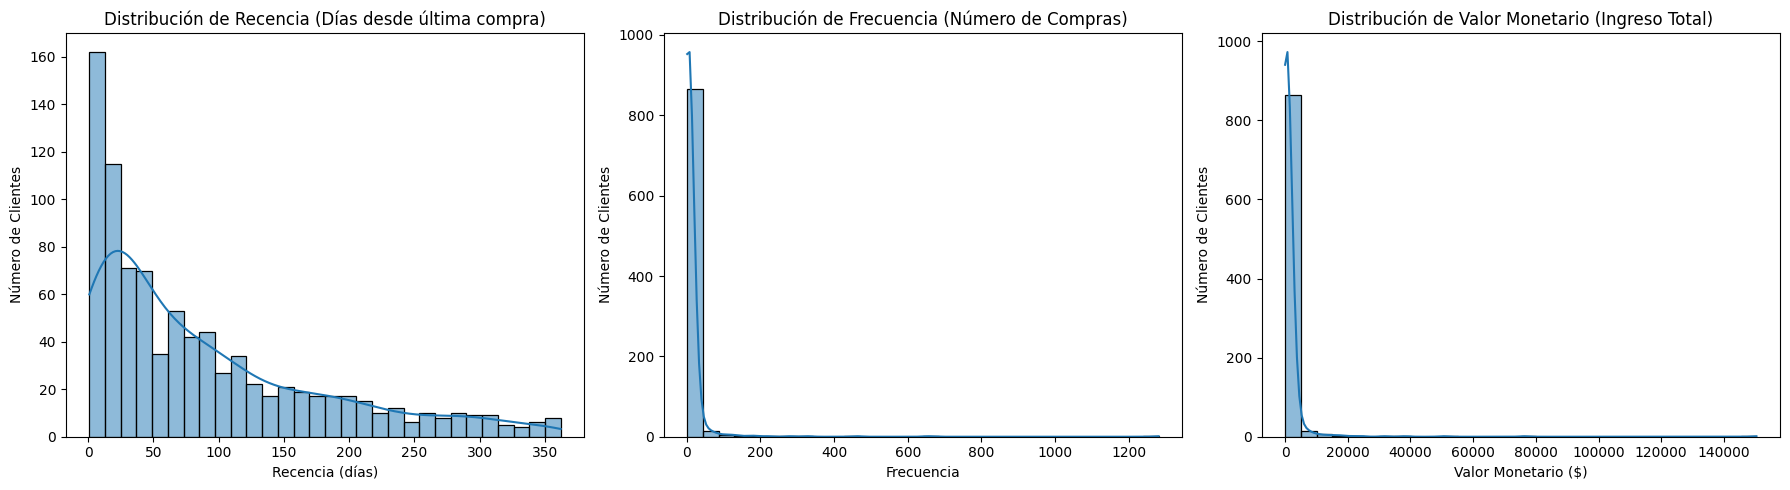


Observaciones RFM:
- La Recencia media es de 89 días. Muchos clientes tienen su última compra hace tiempo.
- La mayoría de los clientes tienen una Frecuencia baja (1 o 2 compras), lo que indica poca lealtad o compra de 'una sola vez'.
- El Valor Monetario está sesgado hacia la izquierda, con la mayoría de clientes gastando poco, y unos pocos 'grandes gastadores'.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Análisis de la Pregunta 1: Clientes Más Valiosos (RFM) ---")

# Para Recencia, necesitamos una fecha de referencia. Usamos la fecha de la última compra en el dataset + 1 día.
fecha_referencia = df_transacciones['fecha_compra'].max() + timedelta(days=1)

# Calcular Recencia, Frecuencia y Valor Monetario por cliente
rfm = df_transacciones.groupby('cliente_id').agg(
    recencia=('fecha_compra', lambda date: (fecha_referencia - date.max()).days), # Días desde la última compra
    frecuencia=('transaccion_id', 'nunique') # Número de transacciones únicas
).reset_index()

# Calcular el valor monetario a partir de df_ventas (que ya tiene 'ingreso_linea')
# Sumamos el ingreso total por cliente de todas las líneas de venta
ingreso_por_cliente = df_ventas.groupby('cliente_id')['ingreso_linea'].sum().reset_index()
ingreso_por_cliente.rename(columns={'ingreso_linea': 'valor_monetario'}, inplace=True)

# Unir el valor monetario al DataFrame RFM
rfm = pd.merge(rfm, ingreso_por_cliente, on='cliente_id', how='left')

# Ver los 10 clientes con mayor valor monetario
print("\nTop 10 Clientes por Valor Monetario (más valiosos):")
print(rfm.sort_values(by='valor_monetario', ascending=False).head(10))

# --- Visualizaciones RFM ---
plt.figure(figsize=(18, 5))

# Histograma de Recencia
plt.subplot(1, 3, 1)
sns.histplot(rfm['recencia'], bins=30, kde=True)
plt.title('Distribución de Recencia (Días desde última compra)')
plt.xlabel('Recencia (días)')
plt.ylabel('Número de Clientes')

# Histograma de Frecuencia
plt.subplot(1, 3, 2)
sns.histplot(rfm['frecuencia'], bins=30, kde=True)
plt.title('Distribución de Frecuencia (Número de Compras)')
plt.xlabel('Frecuencia')
plt.ylabel('Número de Clientes')

# Histograma de Valor Monetario
plt.subplot(1, 3, 3)
sns.histplot(rfm['valor_monetario'], bins=30, kde=True)
plt.title('Distribución de Valor Monetario (Ingreso Total)')
plt.xlabel('Valor Monetario ($)')
plt.ylabel('Número de Clientes')

plt.tight_layout()
plt.show()

# Insight Rápido:
# Puedes segmentar a los clientes basándote en percentiles de RFM (ej. top 20% en cada métrica)
# o usar técnicas de clustering (K-Means) para una segmentación más robusta.
# Para este ejemplo, observa las colas de los histogramas: los pocos clientes con alta frecuencia/valor.
print("\nObservaciones RFM:")
print(f"- La Recencia media es de {rfm['recencia'].mean():.0f} días. Muchos clientes tienen su última compra hace tiempo.")
print(f"- La mayoría de los clientes tienen una Frecuencia baja (1 o 2 compras), lo que indica poca lealtad o compra de 'una sola vez'.")
print(f"- El Valor Monetario está sesgado hacia la izquierda, con la mayoría de clientes gastando poco, y unos pocos 'grandes gastadores'.")

In [ ]:
from google.colab import files

# Save the consolidated DataFrame to a CSV file
rfm.to_csv('rfm_analysis.csv', index=False)

files.download('rfm_analysis.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>